In [29]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import coffea files -- signal and background

In [31]:
prefix = './coffea/skimmed/'

#suffix = 'BDT_v1_goodVtx_v10'
suffix = 'BDT_v1_goodVtx_v10'

In [32]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [33]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

## Signal

In [34]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [35]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [36]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [37]:
table = eff_cutflow
table.columns = cutnames

In [38]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [39]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [40]:
table = cts_cutflow
table.columns = cutnames

In [41]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.0355,23.2497,22.6538,22.6382,22.6382,22.4671,13.0345
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",653.3357,565.9179,550.5692,550.4106,550.4106,545.7087,381.8064
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",809.7825,701.1258,682.4434,682.0879,682.0879,677.1237,494.4256
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.1167,38.8657,37.6616,37.6491,37.6428,37.3623,25.6032
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,075.5539",919.8550,896.4311,896.0713,896.0713,889.0417,685.4295
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",694.2471,599.8579,580.8584,580.8584,580.8584,575.7876,507.4014
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,439.8035","1,246.5330","1,211.0406","1,211.0406","1,211.0406","1,202.0942",962.0123
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,067.0622","9,652.4573","9,369.6270","9,369.6270","9,369.6270","9,298.7876","7,389.5913"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,104.9556,89.1995,86.8710,86.8710,86.8710,86.6113,73.4252
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,184.5614","1,886.2087","1,836.7246","1,834.8219","1,834.8219","1,822.9316","1,543.6354"


In [42]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [43]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [44]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [45]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


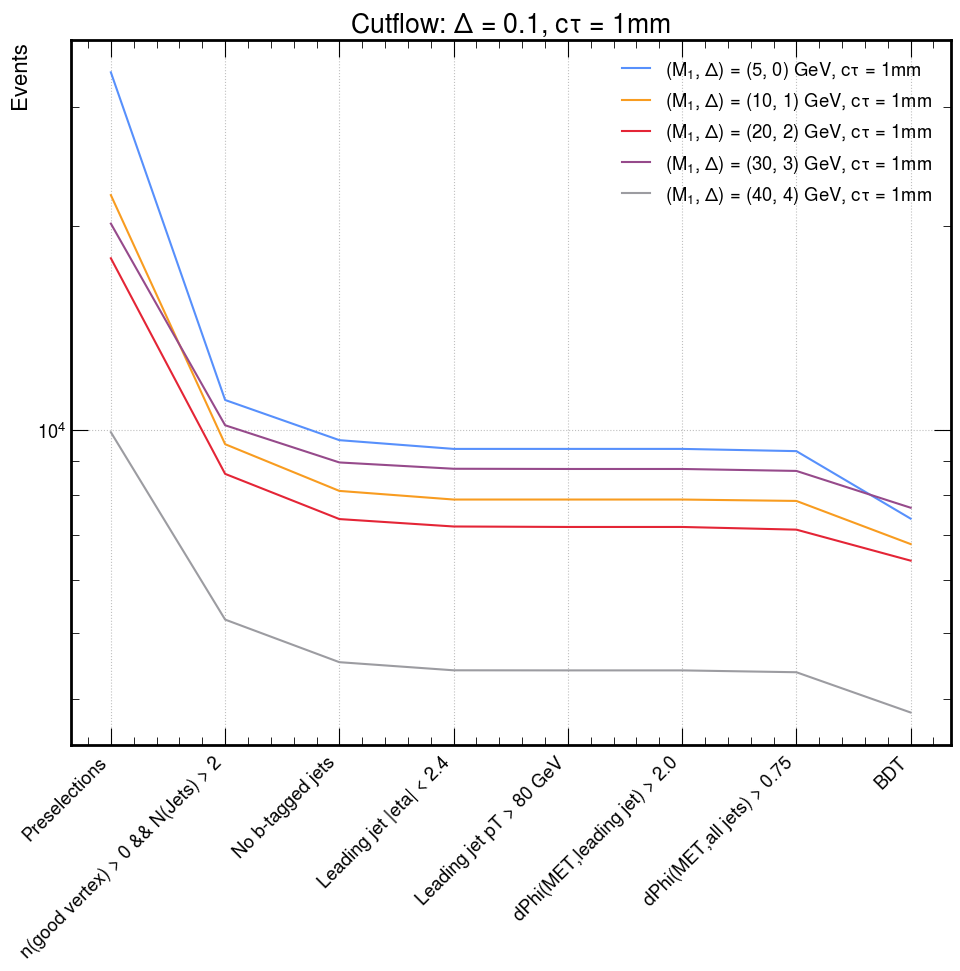

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


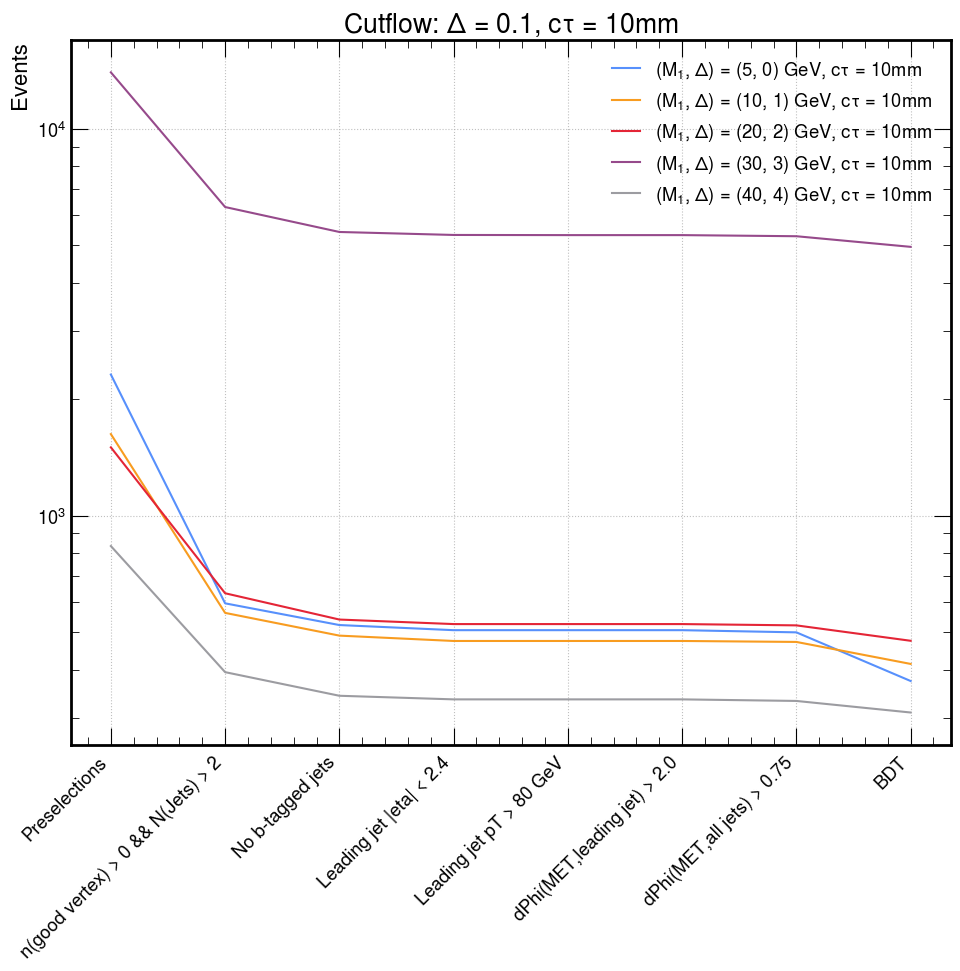

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


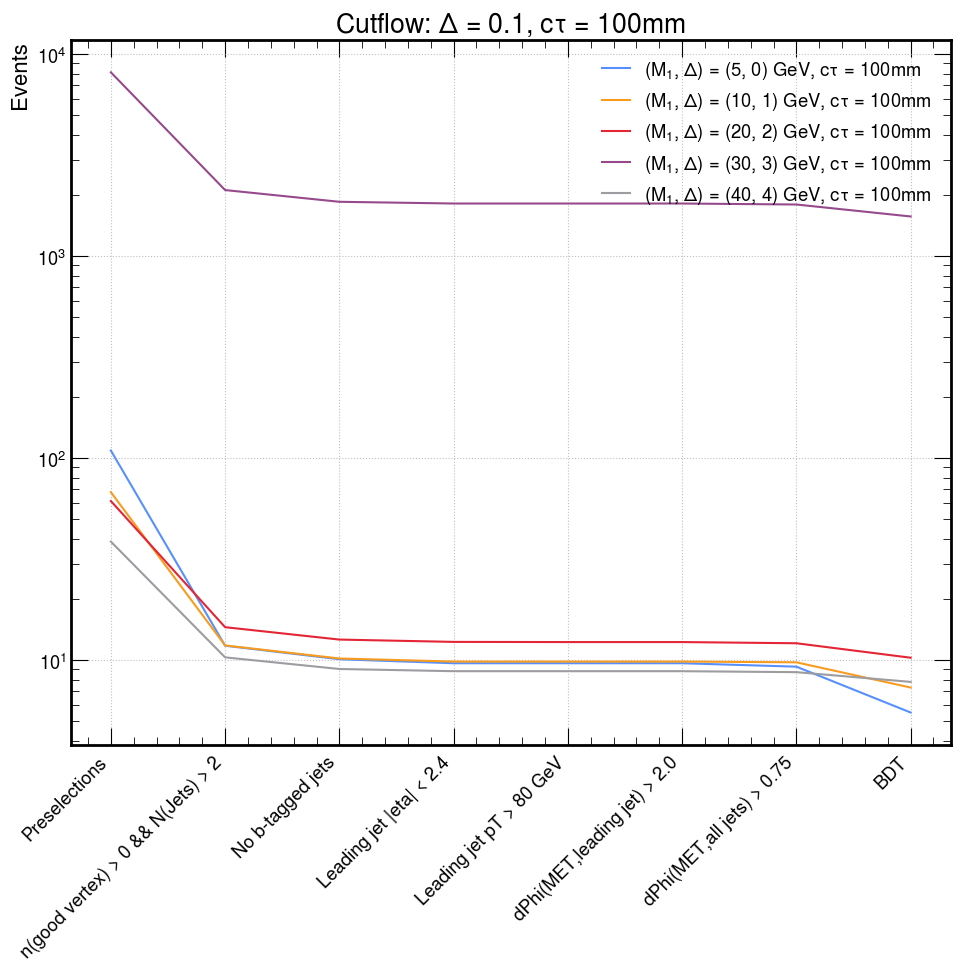

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


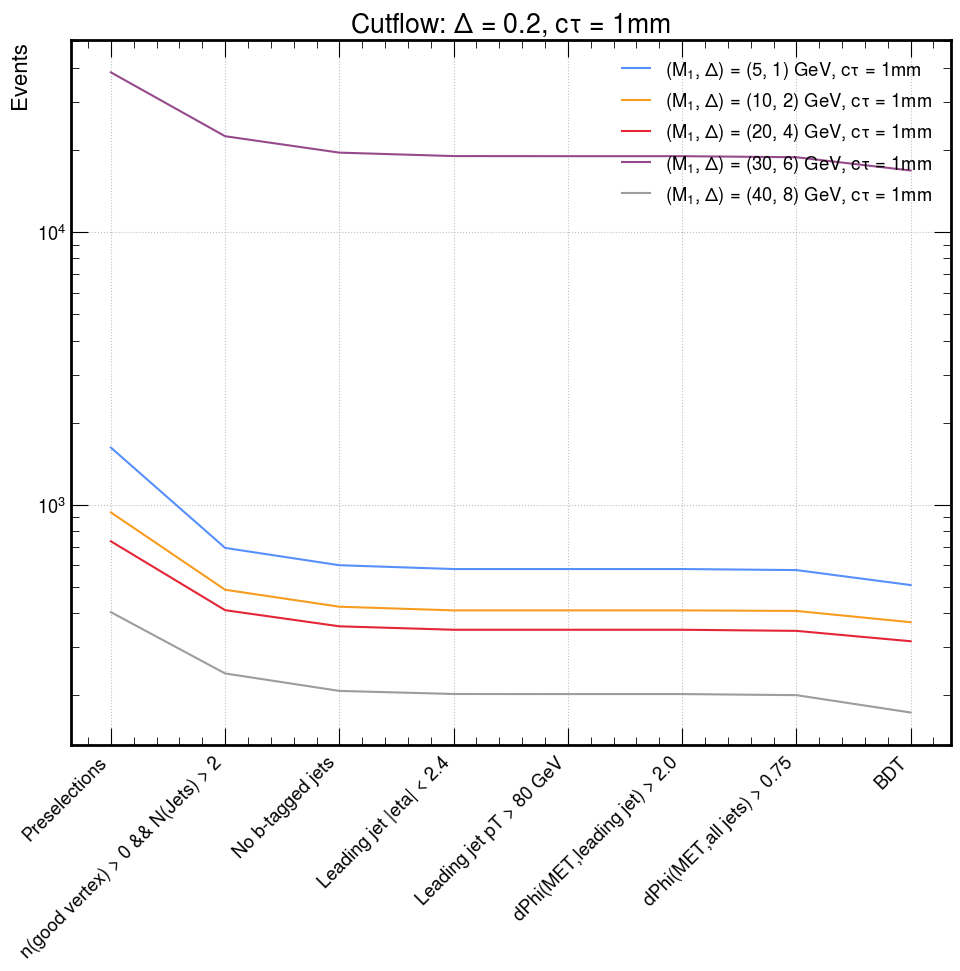

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


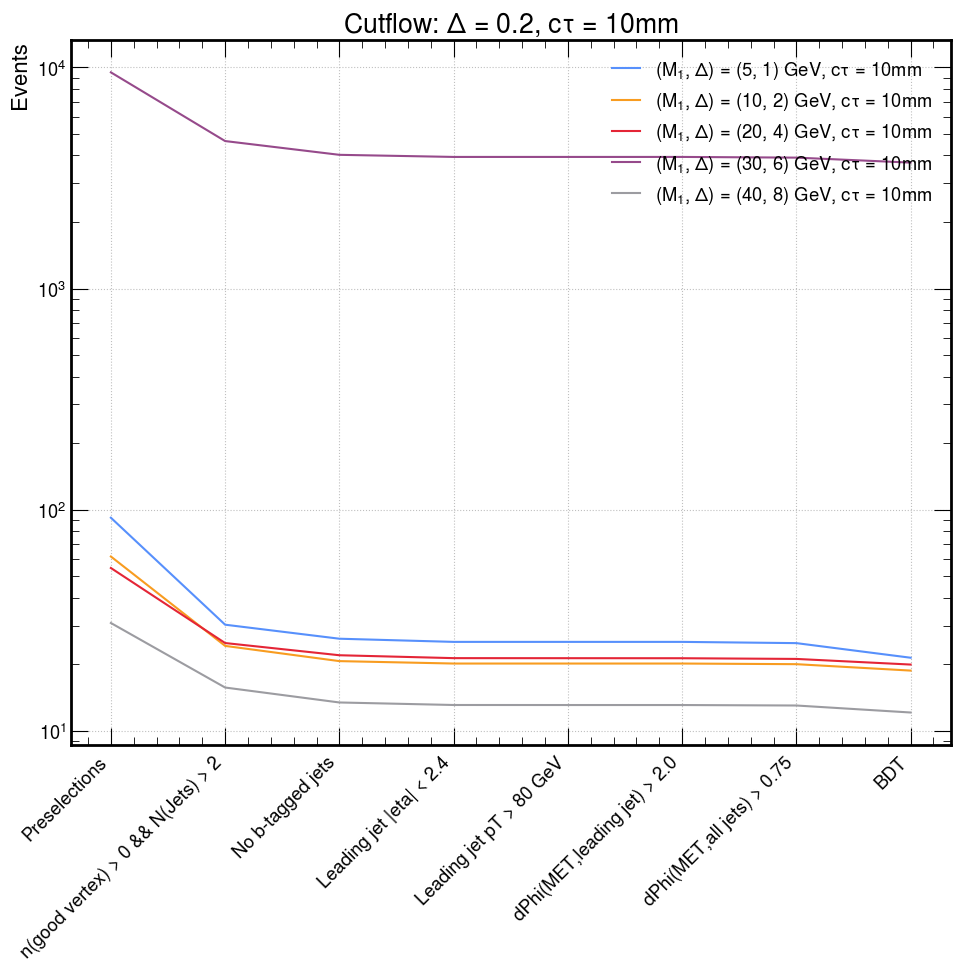

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


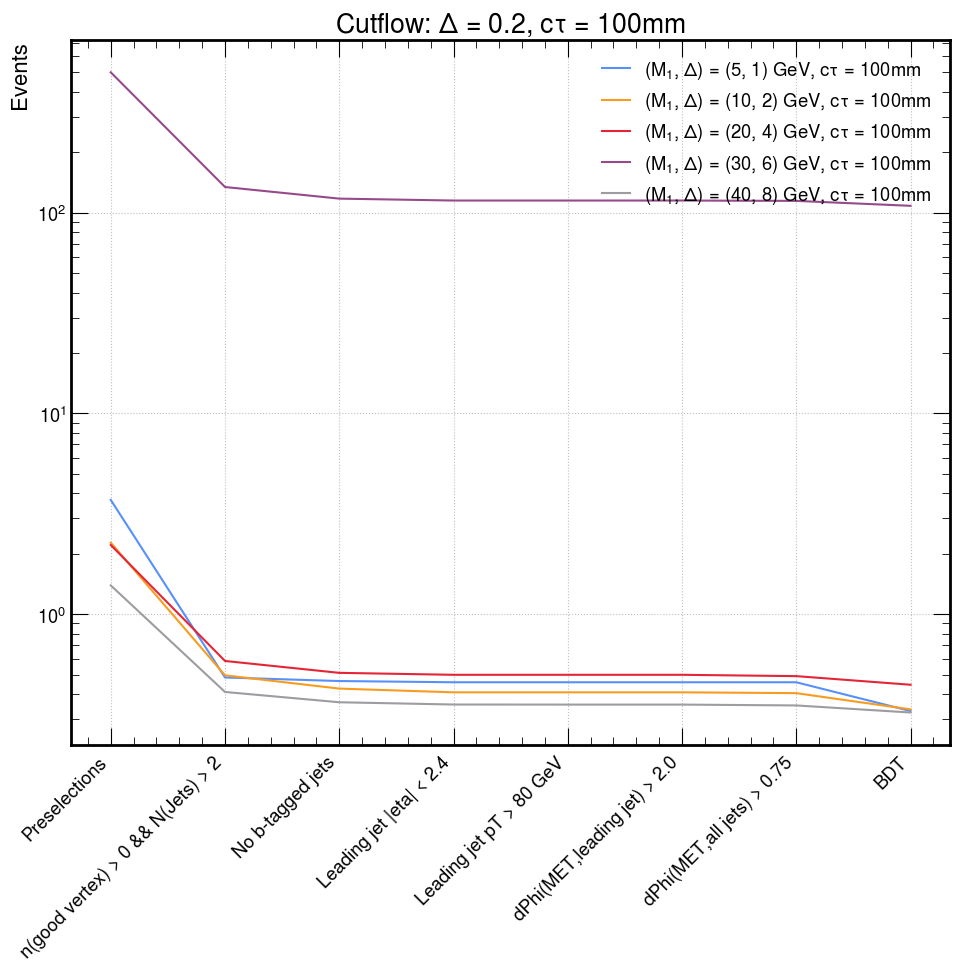

In [46]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


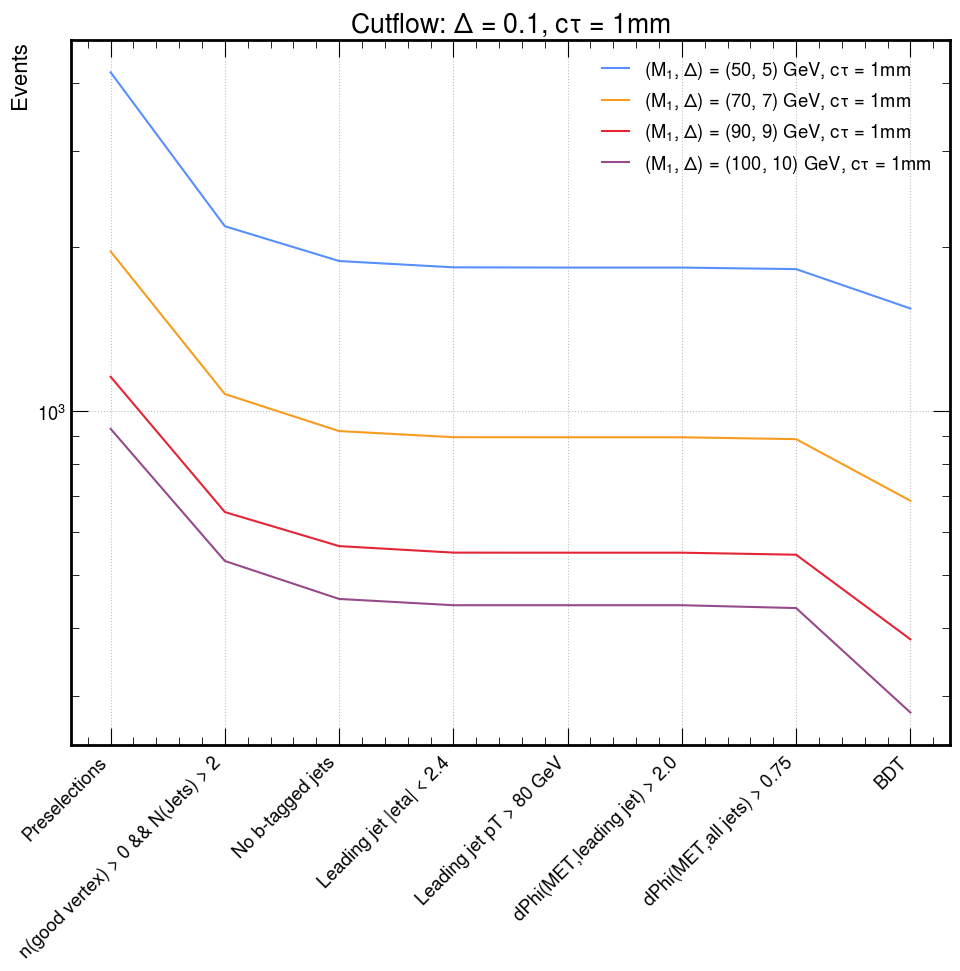

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


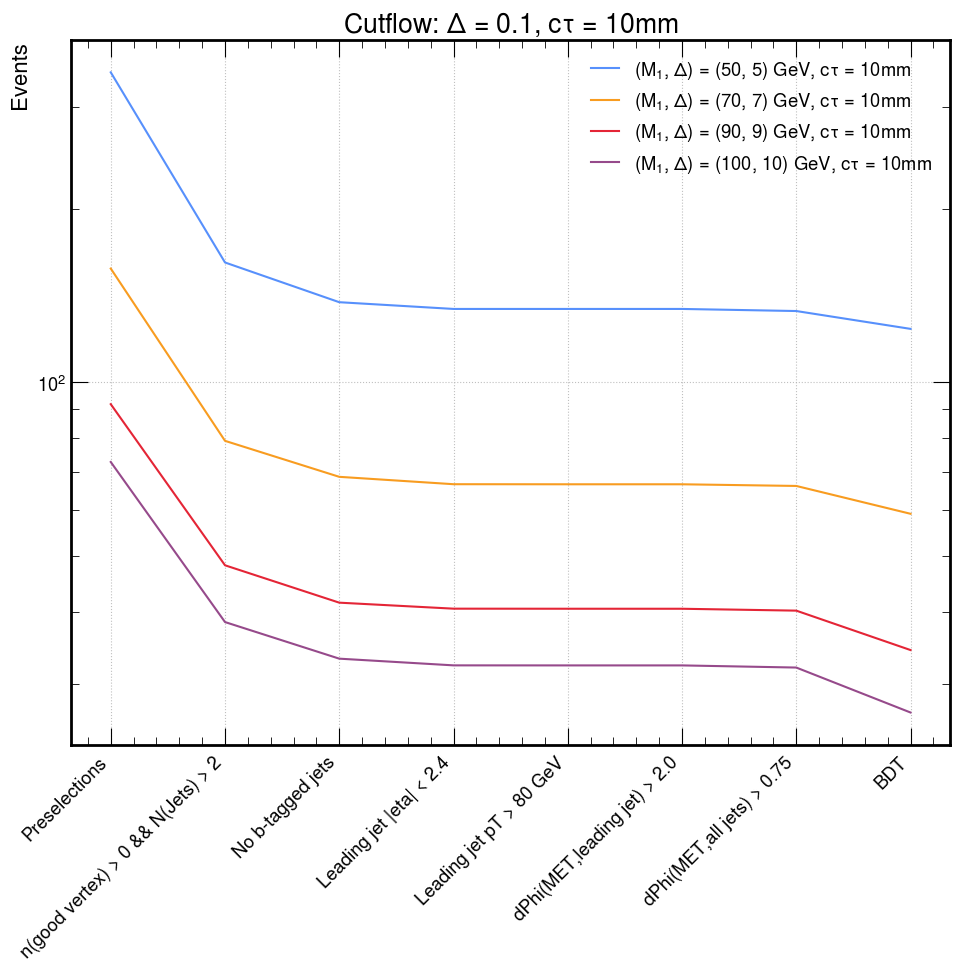

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


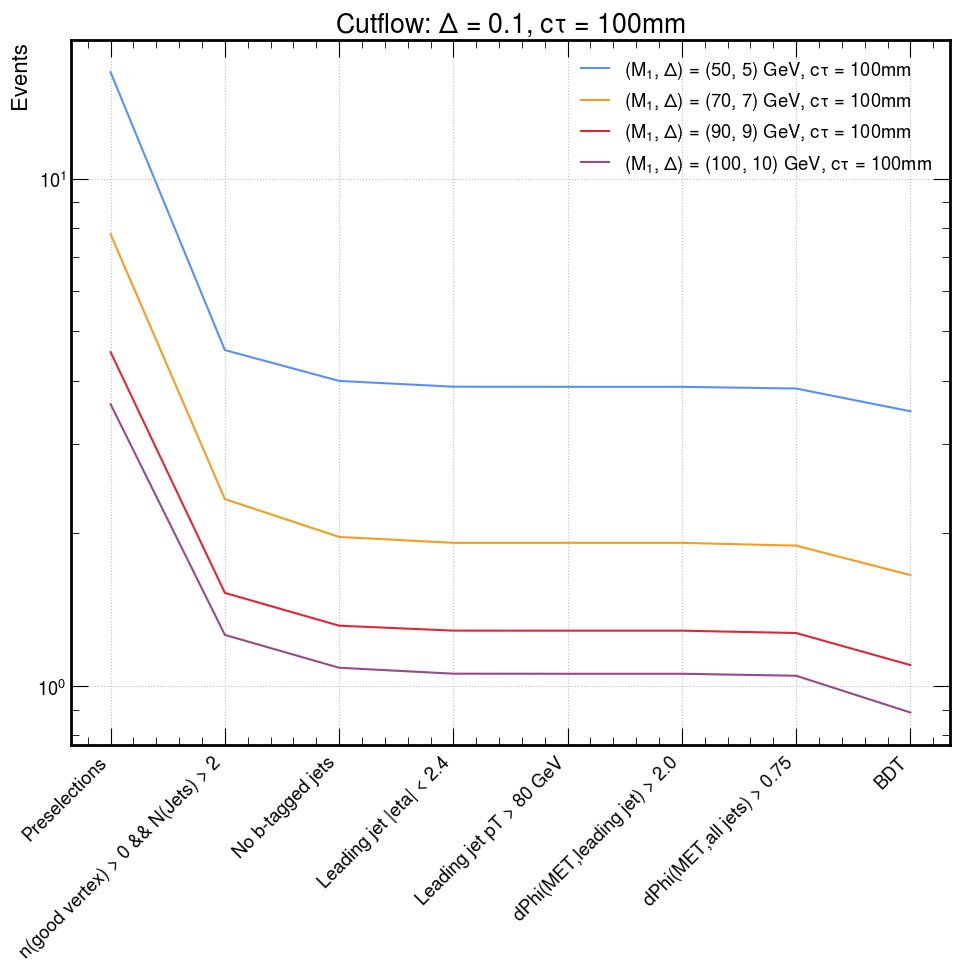

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


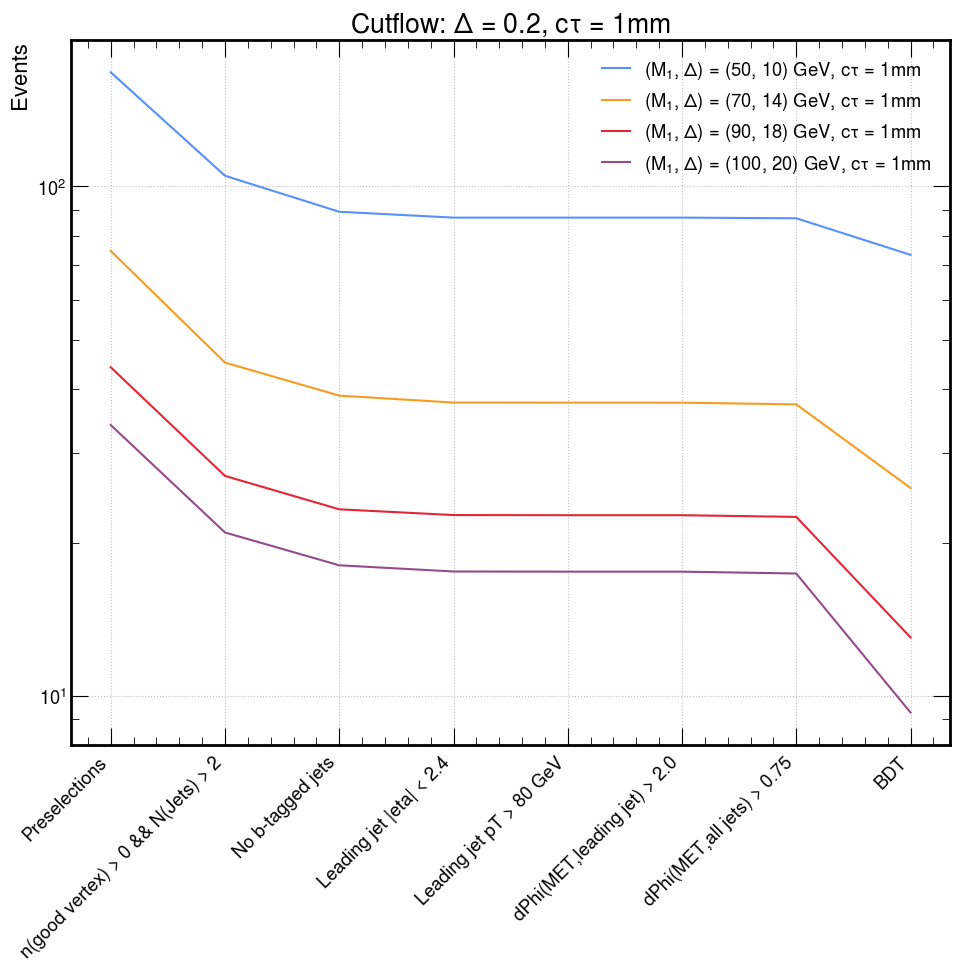

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


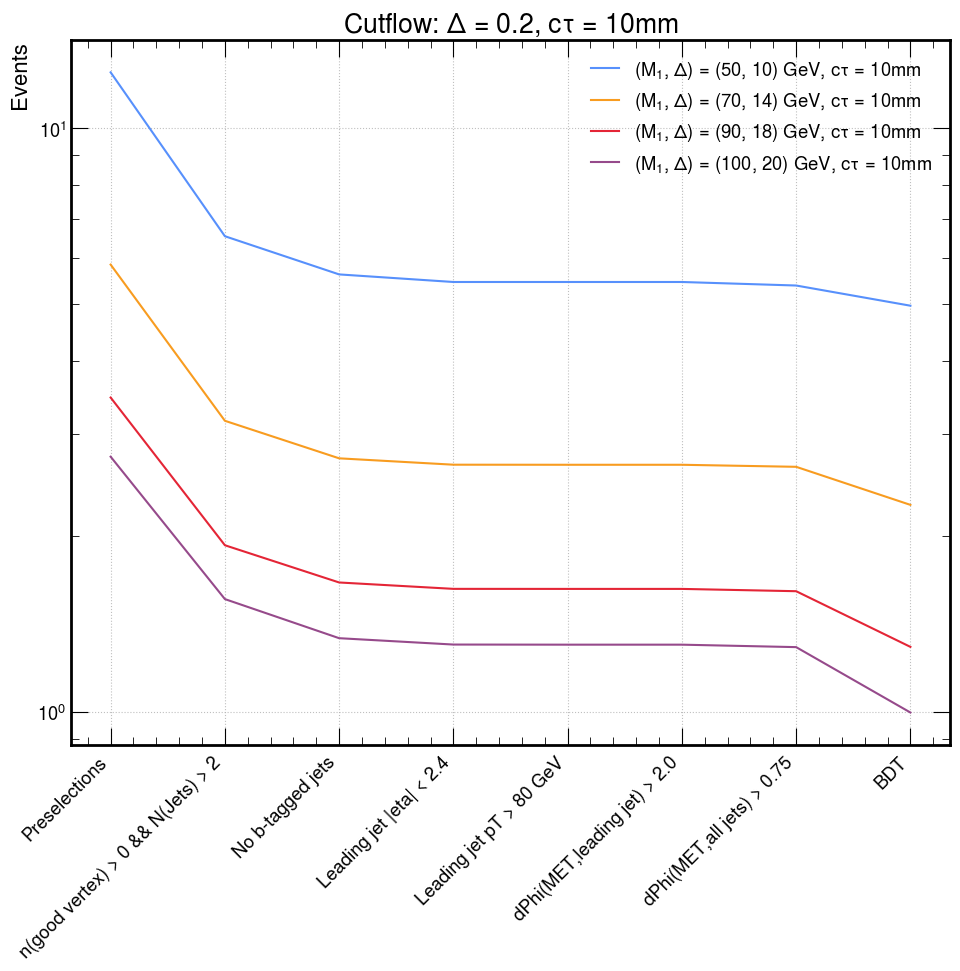

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


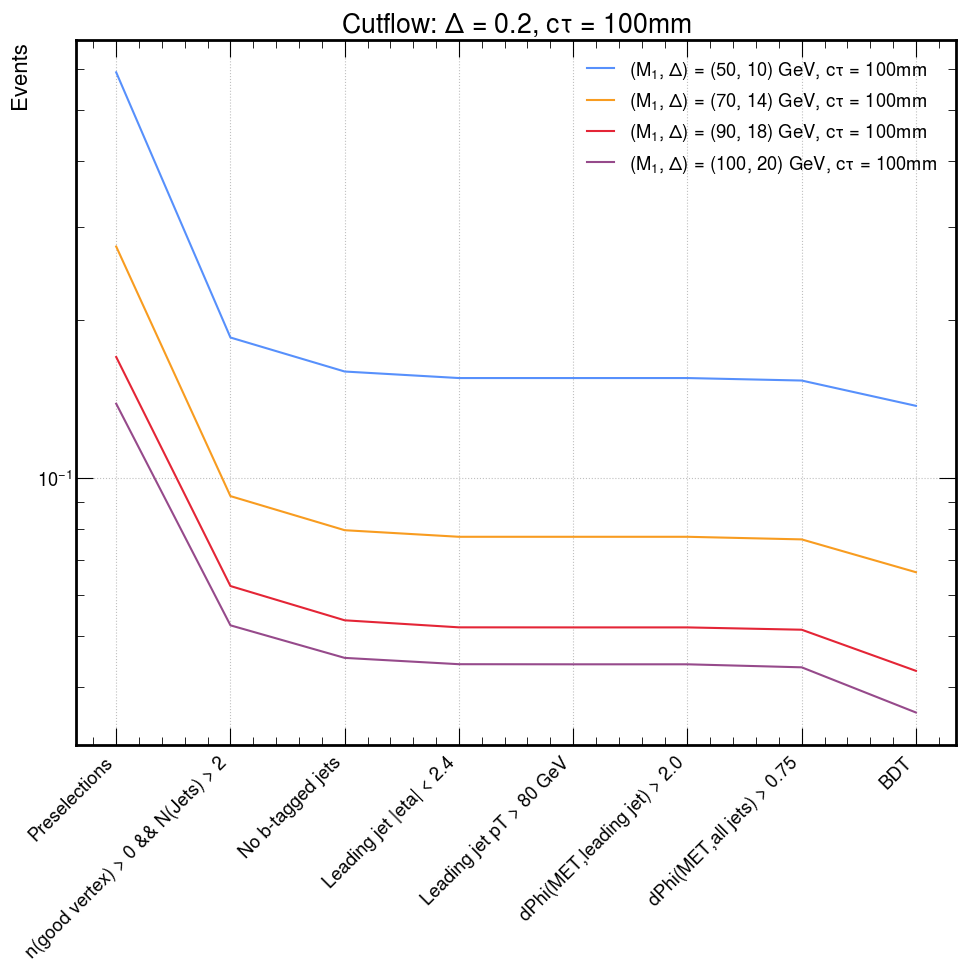

In [47]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [48]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
ZJets,0.00242159,0.00004092,0.00003357,0.00003212,0.00003188,0.00003179,0.00003005,0.00000076
DY,0.00018701,0.00000911,0.00000722,0.00000702,0.00000697,0.00000692,0.00000637,0.00000032
Multiboson,0.00065832,0.00002550,0.00001943,0.00001770,0.00001533,0.00001472,0.00001434,0.00000007
QCD,0.00000249,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Top,0.00039885,0.00000872,0.00000533,0.00000477,0.00000445,0.00000439,0.00000414,0.00000008
ZGamma,0.00032468,0.00001085,0.00000951,0.00000847,0.00000709,0.00000721,0.00000723,-0.00000013
WJets,0.00101318,0.00001998,0.00001606,0.00001539,0.00001518,0.00001511,0.00001417,0.00000031
Total,0.00001696,0.00000030,0.00000023,0.00000022,0.00000022,0.00000022,0.00000020,0.00000000


In [49]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v1_goodVtx_v10/Cutflow/Efficiency//Background_Efficiency.csv


In [50]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
ZJets,"63,745.58","1,077.24",883.75,845.40,839.25,836.83,791.02,20.05
DY,"5,819.49",283.63,224.70,218.46,216.97,215.32,198.30,10.04
Multiboson,"4,588.16",177.76,135.42,123.37,106.85,102.62,99.94,0.50
QCD,"53,432.27",143.90,73.61,43.30,43.30,38.85,16.05,0.00
Top,"26,174.93",572.21,349.98,312.94,292.06,288.39,271.38,5.20
ZGamma,"1,665.13",55.64,48.78,43.44,36.34,36.98,37.07,-0.66
WJets,"214,692.24","4,234.00","3,402.86","3,260.74","3,217.36","3,202.03","3,002.86",65.65
Total,"370,117.80","6,544.37","5,119.10","4,847.66","4,752.13","4,721.01","4,416.62",100.77


In [51]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v1_goodVtx_v10/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [52]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
ZJets,738994,6747,5290,5122,5081,5019,4378,115
DY,296131,5911,3794,3742,3731,3580,2830,122
Multiboson,25187,989,749,682,576,533,512,2
QCD,31490,53,14,13,13,12,2,0
Top,703976,14988,8943,7951,7307,7135,6664,98
ZGamma,6506,231,182,170,151,143,133,2
WJets,1177020,11371,8501,8219,8116,8002,7119,156
Total,2979304,40290,27473,25899,24975,24424,21638,495


In [53]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",BDT
ZJets,738994,6747,5290,5122,5081,5019,4378,115
DY,296131,5911,3794,3742,3731,3580,2830,122
Multiboson,25187,989,749,682,576,533,512,2
QCD,31490,53,14,13,13,12,2,0
Top,703976,14988,8943,7951,7307,7135,6664,98
ZGamma,6506,231,182,170,151,143,133,2
WJets,1177020,11371,8501,8219,8116,8002,7119,156
Total,2979304,40290,27473,25899,24975,24424,21638,495


In [54]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v1_goodVtx_v10/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [55]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 100.77


In [56]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,ZJets,DY,Multiboson,QCD,Top,ZGamma,WJets,Total
Weighted Counts,20.05,10.04,0.50,0.00,5.20,-0.66,65.65,100.77
Raw Counts,115.00,122.00,2.00,0.00,98.00,2.00,156.00,495.00
